In [2]:
import pandas as pd
import seaborn as sns

In [3]:
# read result file for language and location and combine 

#popularity = {'search_score': 1-tup['rank']/n_res}#relative

In [4]:
# activate eith #1, #2 or #3 to find the scores

In [5]:
#1
df = pd.read_csv("output_bylang_with_popularity.csv")

In [6]:
#2
df = pd.read_csv("output_byloc_with_popularity.csv")

In [7]:
#3
#get ranks for 1248 websites
import xlrd 
import time
import pandas as pd
import os

rank_list = []  
loc = ("/home/hina/iogames/iogames_codebase/Task4_get_alexa_ranks/") 
  
df = pd.read_excel(
     os.path.join("the_1248.xlsx"),
     engine='openpyxl', header = None,
)
df = df.rename(columns={0: 'website'})
df

,website,1
0,addictinggames.com,10803
1,browsergameshub.com,4491398
2,de.gamepost.com,492127
3,dotio.games,NaN
4,ea.pogo.com,6049
...,...,...
1243,youxi.321freegames.com,2962101
1244,zh.boardgamearena.com,5178
1245,zh.iogame.io,854181
1246,zh.pog.com,79675


In [8]:
df['website'].to_csv('1248_websites.csv',index = False)

In [9]:
pwd

'/data/iogames_code/1_marketplace_indexing'

In [10]:
# load popularity lists

#Alexa top1M
df_alexa= pd.read_csv("./indexing/internet_top_lists/alexa-top-1m.txt", header = None)
df_alexa
df_alexa.columns = ['Rank', 'Website']
df_alexa.head(5)

,Rank,Website
0,1,google.com
1,2,youtube.com
2,3,baidu.com
3,4,facebook.com
4,5,bilibili.com


In [11]:
# get ranks by alexa_ranks
l_alexa = []
for index, row in df_alexa.iterrows():
#     print(row)
    if row['Website'] in df['website'].to_list():
#         print(row['Website'],row['Rank'])
        d= {"website": row["Website"],"alexa_rank":row['Rank']}
        l_alexa.append(d)
    else:
        pass
alexa_result = pd.DataFrame(l_alexa)
alexa_result

,website,alexa_rank
0,apkpure.com,511
1,epicgames.com,589
2,poki.com,969
3,vseigru.net,1769
4,plarium.com,4442
...,...,...
72,poki.be,645498
73,game-game.web.tr,659220
74,freeonlinemahjonggames.net,674105
75,poki.at,683322


In [12]:
# #Majestic top1M
df_majestic = pd.read_csv("./indexing/internet_top_lists/majestic_million.csv")
df_majestic.head(5)

,GlobalRank,TldRank,Domain,TLD,RefSubNets,RefIPs,IDN_Domain,IDN_TLD,PrevGlobalRank,PrevTldRank,PrevRefSubNets,PrevRefIPs
0,1,1,google.com,com,504710,2632872,google.com,com,1,1,505887,2644923
1,2,2,facebook.com,com,503645,2785660,facebook.com,com,2,2,504788,2797727
2,3,3,youtube.com,com,455709,2272575,youtube.com,com,3,3,456951,2283594
3,4,4,twitter.com,com,447261,2246848,twitter.com,com,4,4,448381,2256993
4,5,5,instagram.com,com,379059,1833615,instagram.com,com,5,5,380176,1842150


In [13]:
# get ranks by majestic_ranks
l_majestic = []
for index, row in df_majestic.iterrows():
#     print(row)
    if row['Domain'] in df['website'].to_list():
#         print(row['Domain'],row['GlobalRank'])
        d= {"website": row["Domain"],"majestic_rank":row['GlobalRank']}
        l_majestic.append(d)
    else:
        pass
majestic_result = pd.DataFrame(l_majestic)
majestic_result

,website,majestic_rank
0,epicgames.com,1214
1,pbskids.org,2600
2,apkpure.com,3043
3,armorgames.com,6796
4,addictinggames.com,8466
...,...,...
57,poki.pl,912291
58,superhex.io,926674
59,jigsawpuzzles.io,952814
60,ioxgames.com,955231


In [14]:
# #Cisco Umbrella top 1M
df_umbrella = pd.read_csv("./indexing/internet_top_lists/cisco_umbrella_top1M.csv", header=None)
df_umbrella.columns = ['Rank', 'Domain']
df_umbrella.head(5)

,Rank,Domain
0,1,netflix.com
1,2,ftl.netflix.com
2,3,prod.ftl.netflix.com
3,4,api-global.netflix.com
4,5,ichnaea.netflix.com


In [15]:
# get ranks by umbrella_ranks
l_umbrella = []
for index, row in df_umbrella.iterrows():
#     print(row)
    if row['Domain'] in df['website'].to_list():
#         print(row['Domain'],row['Rank'])
        d= {"website": row["Domain"],"umbrella_rank":row['Rank']}
        l_umbrella.append(d)
        
    else:
        pass
umbrella_result = pd.DataFrame(l_umbrella)
umbrella_result

,website,umbrella_rank
0,epicgames.com,2535
1,king.com,3524
2,www.roblox.com,4764
3,poki.com,25958
4,pbskids.org,35273
...,...,...
191,spiele.rtl.de,972875
192,www.dressupwho.com,975609
193,www.hiddenobjectgames.com,975813
194,www.logicieleducatif.fr,996135


In [16]:
# #Quantcast top 1M US
df_quantcast = pd.read_csv("./indexing/internet_top_lists/Quantcast-top1M-USonly.txt", sep='\t')
df_umbrella.columns = ['Rank', 'Website']
df_quantcast.head(5)

,Rank,Site
0,1,google.com
1,2,facebook.com
2,3,amazon.com
3,4,youtube.com
4,5,twitter.com


In [17]:
# get ranks by alexa_ranks
l_quant = []
for index, row in df_quantcast.iterrows():
#     print(row)
    if row['Site'] in df['website'].to_list():
#         print(row['Site'],row['Rank'])
        d= {"website": row["Site"],"quantcast_rank":row['Rank']}
        l_quant.append(d)
    else:
        pass
quantcast_result = pd.DataFrame(l_quant)
quantcast_result

,website,quantcast_rank
0,epicgames.com,390
1,king.com,593
2,apkpure.com,1822
3,frvr.com,2147
4,pbskids.org,2369
5,poki.com,2917
6,plarium.com,3619
7,cardgames.io,5319
8,kizi.com,5556
9,armorgames.com,5985


In [18]:
temp = alexa_result['alexa_rank'].dropna()
temp2 = temp.to_list()
# print(temp2)
plot_alexa = []
for i in temp2:
    if i != "!200":
        plot_alexa.append(i)
plot_alexa

temp = majestic_result['majestic_rank'].dropna()
plot_majestic = temp.to_list()
plot_majestic

temp = umbrella_result['umbrella_rank'].dropna()
plot_umbrella = temp.to_list()
plot_umbrella

temp = quantcast_result['quantcast_rank'].dropna()
plot_quantcast = temp.to_list()
plot_quantcast

[390,
 593,
 1822,
 2147,
 2369,
 2917,
 3619,
 5319,
 5556,
 5985,
 6902,
 10908,
 18538,
 27332,
 43556,
 45600,
 65457,
 67454,
 81987,
 83987,
 84972,
 86963,
 91703,
 121931,
 131927,
 140680,
 143685,
 192726,
 195496,
 293156,
 311996,
 312948,
 318526,
 327104,
 384100,
 394424,
 417158,
 420797,
 420797]

In [19]:
len(plot_alexa)

77

<ipython-input-20-af5b8a2dd117>:44: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', color='grey', linestyle='-',alpha = 0.3)


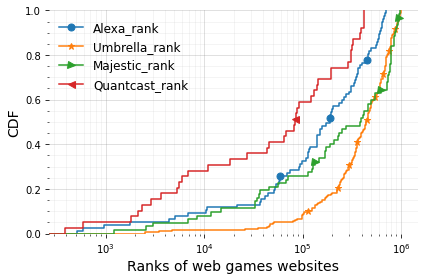

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# sns.set(rc={"figure.dpi":100, 'savefig.dpi':100})
plt.rcParams["figure.figsize"] = (5,3)
# sns.set_theme(style='white')

ax = sns.ecdfplot(x = plot_alexa, label="Alexa_rank",
             marker = 'o',markersize=7, 
             markeredgewidth=1, 
#              markeredgecolor='black', 
             markevery=20)
ax = sns.ecdfplot(x = plot_umbrella,label="Umbrella_rank",
             marker = '*',markersize=7, 
             markeredgewidth=1, 
#              markeredgecolor='black', 
             markevery=20)
ax = sns.ecdfplot(x = plot_majestic,label="Majestic_rank",
             marker = '>',markersize=7, 
             markeredgewidth=1, 
#              markeredgecolor='black', 
             markevery=20)
ax = sns.ecdfplot(x = plot_quantcast, label="Quantcast_rank",
             marker = '<',markersize=7, 
             markeredgewidth=1, 
#              markeredgecolor='black', 
             markevery=20)



ax.set_xscale('log')
# ax.set(xlim=(0, max(plot_data)))
ax.tick_params(axis='x', direction='out', length=4, bottom = True)
ax.tick_params(axis='y', direction='out', length=4, left=True)

plt.legend(frameon = False,fontsize = 12)#.set_alpha(1)
plt.xlabel("Ranks of web games websites",fontsize = 14)
plt.ylabel("CDF",fontsize = 14)

plt.grid()
plt.grid(b=True, which='major', color='grey', linestyle='-',alpha = 0.3)
plt.grid(which='minor', color='grey', alpha=0.1)
plt.minorticks_on()

plt.box(False)
plt.tight_layout()
plt.savefig("ranks_1248.pdf")

/home/hina/notebook/jupyterenv/lib/python3.8/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]
<ipython-input-26-a7b8c74c0c57>:24: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', color='black', linestyle='-',alpha = 0.3)


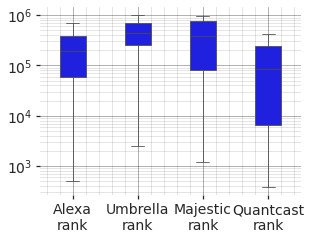

In [26]:
plt.rcParams["figure.figsize"] = (4.5,3.5)
sns.set_theme(style='white')

df_a_box = pd.DataFrame(plot_alexa)
df_u_box = pd.DataFrame(plot_umbrella)
df_m_box = pd.DataFrame(plot_majestic)
df_q_box = pd.DataFrame(plot_quantcast)



combined_dfs = pd.DataFrame({'Alexa\nrank':df_a_box[0],
                             'Umbrella\nrank':df_u_box[0],
                             'Majestic\nrank':df_m_box[0],
                             'Quantcast\nrank':df_q_box[0],
                                



                            })
palette = ['blue','blue','blue','blue']
ax = sns.boxplot(data=combined_dfs,showfliers=False,linewidth = 0.8, width=0.4, palette=palette)


plt.grid(b=True, which='major', color='black', linestyle='-',alpha = 0.3)
plt.grid(which='minor', color='black', alpha=0.1, linestyle='-',)
plt.minorticks_on()

ax.set_yscale('log')

plt.xticks(rotation = 0)
# plt.xlabel(f'x axis',fontsize = 12)
plt.ylabel('')
plt.tick_params(axis='x', direction='out', length=4, bottom = True)
plt.tick_params(axis='y', direction='out', length=4, left=True)
plt.box(False)

ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)


plt.tight_layout()
plt.savefig("ranks_1248_box.pdf")
plt.savefig("/data/iogames_code/5_marketplace_metadata_analysis/output_plots/ranks_1248_box.pdf")
plt.show()

In [20]:
plot_alexa

[511,
 589,
 969,
 1769,
 4442,
 5081,
 6886,
 10559,
 10818,
 21700,
 36947,
 38181,
 41661,
 44967,
 51366,
 52234,
 53258,
 57903,
 58932,
 59068,
 69044,
 75459,
 92079,
 94622,
 99650,
 108587,
 112924,
 115014,
 115458,
 119751,
 139604,
 140836,
 141181,
 141732,
 150134,
 152247,
 159556,
 173674,
 191806,
 192060,
 192067,
 195711,
 199052,
 205866,
 235232,
 253892,
 261175,
 278610,
 299529,
 311119,
 311923,
 335986,
 341583,
 348294,
 358770,
 364217,
 366982,
 386203,
 397420,
 449567,
 467216,
 467247,
 473334,
 491781,
 552696,
 565172,
 589392,
 602240,
 604261,
 605669,
 629898,
 642196,
 645498,
 659220,
 674105,
 683322,
 704998]

In [21]:
rsync -avz hina@hina.science.mq.edu.au:/data/iogames_code/1_marketplace_indexing/ranks_1248_box.pdf /Users/hinaqayyum/Desktop

SyntaxError: invalid syntax (<ipython-input-21-f775eba9ed91>, line 1)

In [ ]:
rsync -avz hina@hina.science.mq.edu.au:/data/iogames_code/1_marketplace_indexing/ranks_1248.pdf /home/hinaqayyum/Desktop/